In [20]:
import json
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set(rc={'axes.facecolor':'#E5E5E5'})
mpl.rcParams['font.family'] = 'Bitstream Vera Serif'

## Plot changes in MMLU 

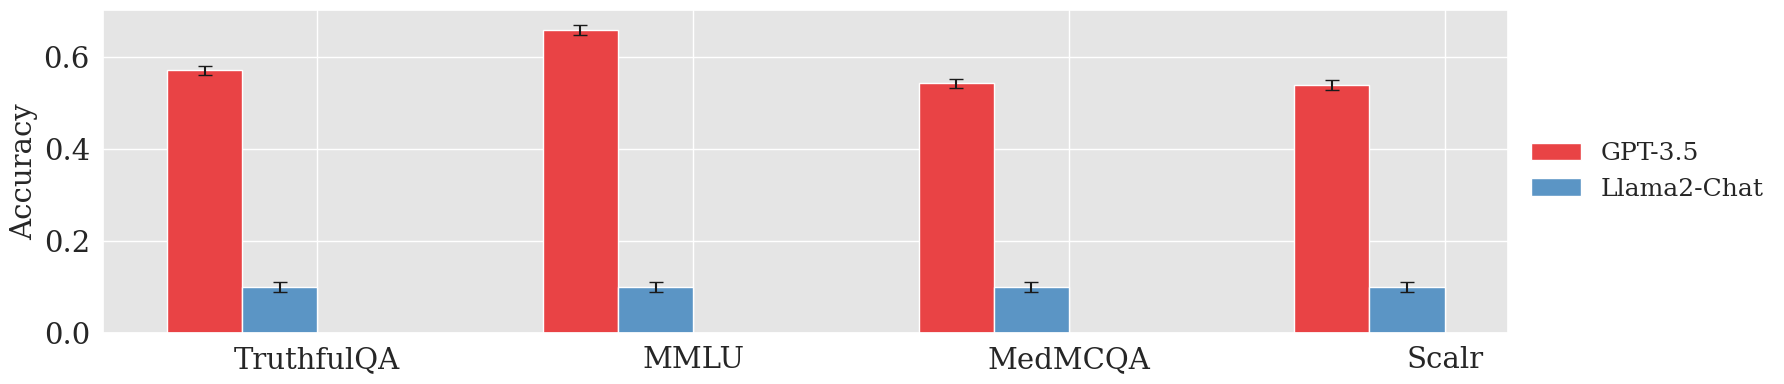

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, to_rgba

def lighten_color(color, amount=0.5):
    """ Lightens the given color by blending it with white.
    Input can be matplotlib color string, hex string, or RGB tuple.
    Amount should be between 0 and 1. """
    try:
        c = np.array(to_rgba(color))
        white = np.array([1, 1, 1, 1])
        return (1 - amount) * c + amount * white
    except ValueError:
        raise ValueError(f"Invalid color: {color}")

# Data for the plot
categories = ['TruthfulQA', 'MMLU', 'MedMCQA', 'Scalr']

gpt_3_5 = [0.572, 0.66, 0.544, 0.54]
llama2_chat = [0.1, 0.1, 0.1, 0.1]
# llama = [0.4, 0.2, 0.45, 0.55, 0.85, 0.9]
# flan_t5 = [0.25, 0.15, 0.2, 0.15, 0.15, 0.1]

# Example standard deviations for error bars (these should ideally come from your data)
gpt_3_5_std = [0.01, 0.01, 0.01, 0.01]
llama2_chat_std = [0.01, 0.01, 0.01, 0.01]
# llama_std = [0.05, 0.04, 0.06, 0.05, 0.07, 0.06]
# flan_t5_std = [0.03, 0.05, 0.04, 0.03, 0.06, 0.04]

x = np.arange(len(categories))
width = 0.2  # the width of the bars

# Using the 'Set1' colormap
original_colors = plt.cm.Set1.colors
light_colors = [lighten_color(color, 0.18) for color in original_colors]

fig, ax = plt.subplots(figsize=(18,4))
rects1 = ax.bar(x - 1.5*width, gpt_3_5, width, label='GPT-3.5', color=light_colors[0], yerr=gpt_3_5_std, capsize=5)  # Lightened Set1 color 0
rects2 = ax.bar(x - 0.5*width, llama2_chat, width, label='Llama2-Chat', color=light_colors[1], yerr=llama2_chat_std, capsize=5)  # Lightened Set1 color 1
# rects3 = ax.bar(x + 0.5*width, llama, width, label='LLaMA', color=light_colors[2], yerr=llama_std, capsize=5)  # Lightened Set1 color 2
# rects4 = ax.bar(x + 1.5*width, flan_t5, width, label='FLAN-T5', color=light_colors[3], yerr=flan_t5_std, capsize=5)  # Lightened Set1 color 3

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('')
ax.set_ylabel('Accuracy', fontsize=21)
# ax.set_title('Normal', fontsize=21)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=21)
ax.tick_params(axis='y', labelsize=21)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=18)


fig.tight_layout()

plt.show()


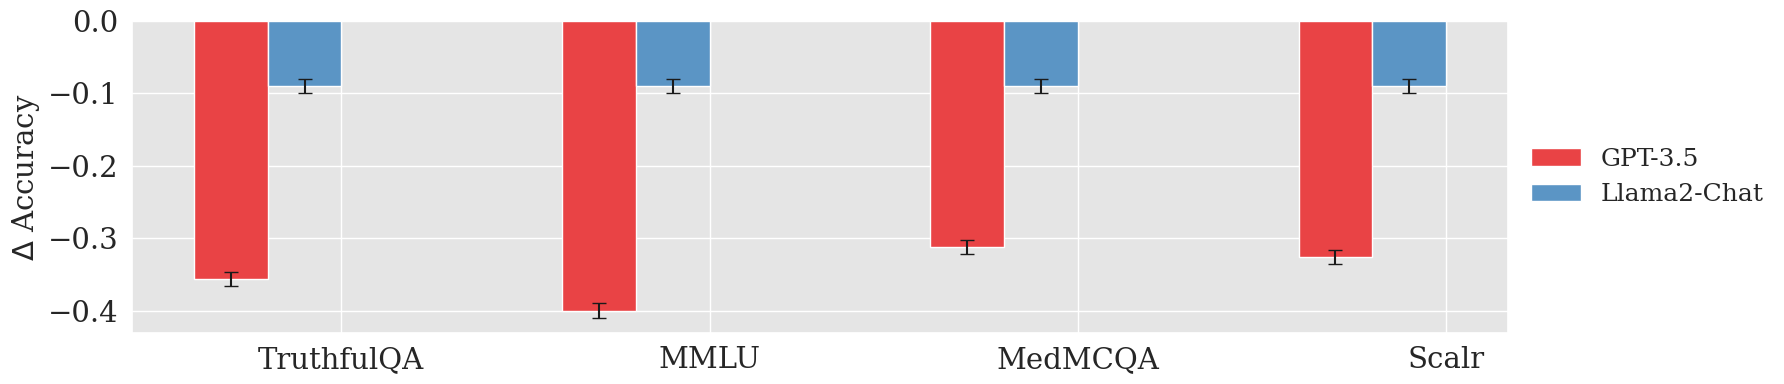

In [29]:
# Data for the plot
categories = ['TruthfulQA', 'MMLU', 'MedMCQA', 'Scalr']

attack_gpt_3_5 = [0.216, 0.260, 0.232, 0.214]
attack_llama2_chat = [0.01, 0.01, 0.01, 0.01]
# llama = [0.4, 0.2, 0.45, 0.55, 0.85, 0.9]
# flan_t5 = [0.25, 0.15, 0.2, 0.15, 0.15, 0.1]


delta_gpt_35 = np.array(attack_gpt_3_5) - np.array(gpt_3_5) 
delta_llama2_chat = np.array(attack_llama2_chat) - np.array(llama2_chat)

# Example standard deviations for error bars (these should ideally come from your data)
attack_gpt_3_5_std = [0.01, 0.01, 0.01, 0.01]
attack_llama2_chat_std = [0.01, 0.01, 0.01, 0.01]
# llama_std = [0.05, 0.04, 0.06, 0.05, 0.07, 0.06]
# flan_t5_std = [0.03, 0.05, 0.04, 0.03, 0.06, 0.04]

x = np.arange(len(categories))
width = 0.2  # the width of the bars

# Using the 'Set1' colormap
original_colors = plt.cm.Set1.colors
light_colors = [lighten_color(color, 0.18) for color in original_colors]

fig, ax = plt.subplots(figsize=(18,4))
rects1 = ax.bar(x - 1.5*width, delta_gpt_35, width, label='GPT-3.5', color=light_colors[0], yerr=attack_gpt_3_5_std, capsize=5)  # Lightened Set1 color 0
rects2 = ax.bar(x - 0.5*width, delta_llama2_chat, width, label='Llama2-Chat', color=light_colors[1], yerr=attack_llama2_chat_std, capsize=5)  # Lightened Set1 color 1
# rects3 = ax.bar(x + 0.5*width, llama, width, label='LLaMA', color=light_colors[2], yerr=llama_std, capsize=5)  # Lightened Set1 color 2
# rects4 = ax.bar(x + 1.5*width, flan_t5, width, label='FLAN-T5', color=light_colors[3], yerr=flan_t5_std, capsize=5)  # Lightened Set1 color 3

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('')
ax.set_ylabel(r'$\Delta$ Accuracy', fontsize=21)
# ax.set_title('Attack', fontsize=21)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=21)
ax.tick_params(axis='y', labelsize=21)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=18)

fig.tight_layout()

plt.show()